# 3.2 Exploratory Component

#### Miriam Pohl Khader | S194717

In [2]:
# libraries
import pandas as pd
import numpy as np
import random

from matplotlib import colors as mcolors
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split

import folium
from folium import plugins

from folium.plugins import HeatMap
import hdbscan
import utm
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from colour import Color
from folium.vector_layers import CircleMarker
import seaborn as sns

In [ ]:
dc = pd.read_csv("Trips_2018.csv")

In [ ]:
y=dc['tripduration']
X=dc[:]
del X['tripduration']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
dc = x_train

In [ ]:
dstart = dc.drop(columns=['Unnamed: 0', 'stoptime', 'starttime',
       'start_station_id', 'end_station_id','bikeid', 'end_station_latitude', 'end_station_longitude', 'usertype', 'birth_year', 'gender'])
dend = dc.drop(columns=['Unnamed: 0', 'stoptime', 'starttime',
       'start_station_id', 'end_station_id','bikeid', 'start_station_latitude', 'start_station_longitude', 'usertype', 'birth_year', 'gender'])

In [ ]:
dks = dstart.copy()
dke = dend.copy()

## Geographical Clustering

For the exploratory part we'll do geographical clustering on the dataset to see where in the city the demand for bicycles is highest, which is useful for the operator for placing bicycles in high demand spots. The demand is firstly visualized using heatmaps that show the demand. This can be used to compare the clustering and see how well they fit. 
For this part the data is split into a training set and test set, because both Kmeans and HDBSCAN can be used to predicting on new data, though it is not usually necessary.


In [ ]:
dstart['start_station_latitude'] = dstart['start_station_latitude'].astype(float)
dstart['start_station_longitude'] = dstart['start_station_longitude'].astype(float)
dend['end_station_latitude'] = dend['end_station_latitude'].astype(float)
dend['end_station_longitude'] = dend['end_station_longitude'].astype(float)

In [ ]:
heat_data_start = [[row['start_station_latitude'],row['start_station_longitude']] for index, row in dstart.iterrows()]
heat_data_end = [[row['end_station_latitude'],row['end_station_longitude']] for index, row in dend.iterrows()]

In [ ]:
map_NewYorkStart = folium.Map([40.767, -73.994], zoom_start = 10)
map_NewYorkEnd = folium.Map([40.767, -73.994], zoom_start = 10)

In [ ]:
HeatMap(heat_data_start).add_to(map_NewYorkStart)
map_NewYorkStart

In [ ]:
HeatMap(heat_data_end).add_to(map_NewYorkEnd)
map_NewYorkEnd

From the heatmaps it is clear that the demand for bicycles is the highest around central station. Another interesting observation is the amount of bicycles being left in Jersey City and the areas around is very high compared to trips starting in that area.

For the clustering we run K-means clustering for both the start stations and end stations, using 4 clusters which has been decided through testing. The clusters split the data into clusters of similar demand, so the amount of clusters to pick depends on how many different groups of station demand we want.

In [ ]:
dks = dks.groupby(['start_station_latitude', 'start_station_longitude']).size().reset_index(name="Count")
dke = dke.groupby(['end_station_latitude', 'end_station_longitude']).size().reset_index(name="Count")

In [ ]:
K=4
k=KMeans(K)
plt.scatter(dks['start_station_latitude'], dks['start_station_longitude'], c = k.fit_predict(dks), s=10, cmap='viridis')
plt.xlim([40.6, 40.9])
plt.ylim([-74.06, -73.8])

In [ ]:
plt.scatter(dke['end_station_latitude'], dke['end_station_longitude'], c = k.fit_predict(dke), s=10, cmap='viridis')
plt.xlim([40.6, 40.9])
plt.ylim([-74.06, -73.8])

From the graphs we see that kMeans clustering is efficient. When comparing to the heatmaps, they show somewhat the same demand, and that the 4 clusters is a good choice for this case. The problem with this is it doesn't work well on outliers, which we see in the plot where the x-axis and y-axis is not limited (see appendix).

Density based clustering is better for working with outliers. It is run on both start stations and end stations (see appendix). From the density based clustering it is clear that it's very good clustering, but is very inefficient for running large data sets.

Hierarchical density-based clustering is run (see appendix). It makes quite a lot of clusters, but they are hard to distinguish between. From the analysis we see there are very few outliers, making it very good for clustering geographical points. The HDBSCAN is also more precise in deciding how many clusters, compared to Kmeans, where we pick for ourselves. 

In conclusion HDBSCAN or KMeans are the best for clustering in this dataset. KMeans runs best on large data, but HDBSCAN is better at handling outliers, which is very important for further analysis of the data. Kmeans works well for giving an overview of the data, while HDBSCAN is more precise.

## Literature

Knee method for finding epsilon in DBSCAN: https://towardsdatascience.com/k-means-vs-dbscan-clustering-49f8e627de27

Plotting clusters for HDBSCAN: https://hdbscan.readthedocs.io/en/latest/advanced_hdbscan.html

Estimating outliers in HDBSCAN: https://towardsdatascience.com/geographic-clustering-with-hdbscan-ef8cb0ed6051

# Appendix

## Kmeans without limiting axis

In [ ]:
plt.scatter(dks['start_station_latitude'], dks['start_station_longitude'], c = k.fit_predict(dks), s=10, cmap='viridis')
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], c='black', s=100, alpha=1);

In [ ]:
plt.scatter(dke['end_station_latitude'], dke['end_station_longitude'], c = k.fit_predict(dke), s=10, cmap='viridis')
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], c='black', s=100, alpha=1);

## DBSCAN

In [3]:
dx = pd.read_csv("Trips_2018.csv")[:500000]

In [4]:
dds= dx.drop(columns=['Unnamed: 0', 'stoptime', 'starttime',
       'start_station_id', 'end_station_id','bikeid', 'end_station_latitude', 'end_station_longitude', 'usertype', 'birth_year', 'gender'])
dde = dx.drop(columns=['Unnamed: 0', 'stoptime', 'starttime',
       'start_station_id', 'end_station_id','bikeid', 'start_station_latitude', 'start_station_longitude', 'usertype', 'birth_year', 'gender'])

In [5]:
xs=dds[['start_station_longitude', 'start_station_latitude']]
xe=dde[['end_station_longitude', 'end_station_latitude']]

Starting with making DBSCAN for the start stations

Firstly an epsilon value is decided by finding the optimal curvature using the knee method, see literature list. 

[0.         0.         0.         ... 0.         0.         0.00252174]


<function matplotlib.pyplot.show(close=None, block=None)>

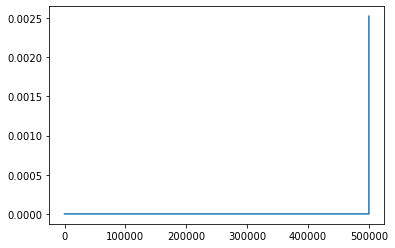

In [6]:
#Deciding epsilon for dbscan

from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors = 5)

nearest_neighbors.fit(xs)
distances, indices = nearest_neighbors.kneighbors(xs)
distances = np.sort(distances, axis=0)[:,1]

print(distances)

plt.plot(distances)
plt.show

The epsilon value is estimated to 0.00252174

In [ ]:
dbs = DBSCAN(min_samples=2000, eps=0.00252174)
dbs.fit(xs)

In [ ]:
num_colors=len(set(dbs.labels_))-1
colors=list(mcolors.CSS4_COLORS.keys())
cluster_colors=random.choices(colors, k=num_colors)
x_=[]
y_=[]
c_=[]
for label, xs, y  in zip(dbs.labels_, dds['start_station_longitude'], dds['start_station_latitude']):
    if label==-1:
        continue
    x_.append(xs)
    y_.append(y)
    c_.append(cluster_colors[label])
plt.figure(figsize=(18, 12))
plt.scatter(x_,y_,s=50,c=c_)

Doing the exact same for the end stations:

In [ ]:
nearest_neighbors.fit(xe)
distances, indices = nearest_neighbors.kneighbors(xe)
distances = np.sort(distances, axis=0)[:,1]

print(distances)

plt.plot(distances)
plt.show

In [ ]:
dbe = DBSCAN(min_samples=2000, eps=0.00304238)
dbe.fit(xe)

In [ ]:
x_=[]
y_=[]
c_=[]
for label, xe, y  in zip(dbe.labels_, dde['end_station_longitude'], dde['end_station_latitude']):
    if label==-1:
        continue
    x_.append(xe)
    y_.append(y)
    c_.append(cluster_colors[label])
plt.figure(figsize=(18, 12))
plt.scatter(x_,y_,s=50,c=c_)



## HDBSCAN

In [ ]:
dh = dx.drop(columns=['Unnamed: 0', 'stoptime', 'starttime', 'start_station_id', 'end_station_id','bikeid', 'usertype', 'birth_year', 'gender'])

First we'll stack the data into one array, and run hdbscan on it and also converting from  degrees to meters


In [ ]:
startstat = dh[['start_station_longitude', 'start_station_latitude']].to_numpy()
endstat = dh[['end_station_longitude', 'end_station_latitude']].to_numpy()

stat = np.vstack((startstat, endstat))

In [ ]:
def fit_utm_cluster(locations, min_cluster_size=20, min_samples=20):
    xyzz = [utm.from_latlon(ll[0], ll[1]) for ll in locations]
    pts = [[p[0], p[1]] for p in xyzz]

    cluster = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, 
                                min_samples=min_samples,
                                metric='euclidean')
    cluster.fit(pts)
    return cluster

In [ ]:
cluster = fit_utm_cluster(stat)

In [ ]:
# see literature list for code reference
color_palette = sns.color_palette('flare')
cluster_colors = [color_palette[x % 6] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in cluster.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, cluster.probabilities_)]
plt.scatter(*stat.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

now we check how many of the cluster data points are outliers, to see if they have significant effect, see literature list for code reference

In [ ]:
plt.hist(cluster.outlier_scores_, bins=50)

from figure it is estimated that it is below 0.01%

In [ ]:
scores = cluster.outlier_scores_
print("Below 0.01 you can find {:.2f}% of the cluster points.".format(100.0 * scores[scores < 0.01].shape[0] / scores.shape[0]))

In [ ]:
plt.rcParams['figure.figsize'] = [8, 8]
score_shape = [scores[scores < x].shape[0] / scores.shape[0] for x in np.arange(0.0, 0.1, 0.01)]
plt.plot(np.arange(0.0, 0.1, 0.01), score_shape)
plt.xlabel("Outlier Score")
plt.ylabel("Point Proportion")
plt.title("Outlier Score Cumulative Distribution")
plt.grid(True)

In [ ]:
scores = cluster.outlier_scores_
scores[scores < 0.01].shape[0] / scores.shape[0]

from analysis we see that there are not many outliers